In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('nigeria_financial_churn_RAW_2000.csv')
df.drop('customer_id', axis=1, inplace=True)
df.head()

,gender,age,state,city_type,occupation,education_level,marital_status,num_dependents,income_monthly_ngn,avg_balance_ngn,...,has_mobile_app,uses_agent,loan_active,savings_goal_met,recent_complaints,last_login_days_ago,bvn_verified,nin_linked,telecom_provider,churn
0,Male,45,Lagos,Peri-urban,Student,No formal,Widowed,1,171790.0,20470.0,...,1,1,0,0,0,142,1,1,9mobile,1
1,Female,24,Benue,Peri-urban,Unemployed,No formal,Widowed,3,13816.0,73385.0,...,1,0,0,0,0,343,1,1,Airtel,1
2,Female,52,Lagos,Urban,Unemployed,No formal,Married,5,49325.0,15407.0,...,1,0,0,1,0,215,0,1,9mobile,0
3,Female,45,Rivers,Rural,Trader,Primary,Married,2,122653.0,111059.0,...,1,0,0,0,0,233,1,1,Airtel,0
4,Male,31,Rivers,Urban,Trader,Secondary,Married,2,80714.0,3705.0,...,0,1,0,0,0,54,1,0,GLO,0


- EDA

In [23]:
df.shape

(2000, 24)

In [24]:
df.isna().sum()

gender                    0
age                       0
state                     0
city_type                 0
occupation                0
education_level           0
marital_status            0
num_dependents            0
income_monthly_ngn        0
avg_balance_ngn           0
monthly_deposit_ngn       0
monthly_withdrawal_ngn    0
monthly_transactions      0
num_products              0
has_mobile_app            0
uses_agent                0
loan_active               0
savings_goal_met          0
recent_complaints         0
last_login_days_ago       0
bvn_verified              0
nin_linked                0
telecom_provider          0
churn                     0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.describe()

,age,num_dependents,income_monthly_ngn,avg_balance_ngn,monthly_deposit_ngn,monthly_withdrawal_ngn,monthly_transactions,num_products,has_mobile_app,uses_agent,loan_active,savings_goal_met,recent_complaints,last_login_days_ago,bvn_verified,nin_linked,churn
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,43.715500,2.02950,103176.981000,49804.735500,30431.064000,22998.779000,8.036000,1.618000,0.750500,0.307500,0.196000,0.311000,0.094000,182.800000,0.898000,0.759000,0.193000
std,14.965311,1.41125,107079.422444,49141.603231,30788.160746,26009.081895,2.858809,0.876619,0.432832,0.461574,0.397068,0.463019,0.305304,106.540177,0.302724,0.427797,0.394752
min,18.000000,0.00000,5000.000000,14.000000,29.000000,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,1.00000,37648.500000,14196.250000,8835.500000,5831.750000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,91.000000,1.000000,1.000000,0.000000
50%,44.000000,2.00000,70870.500000,34664.500000,20334.500000,14214.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,183.000000,1.000000,1.000000,0.000000
75%,57.000000,3.00000,127306.500000,69536.000000,42489.250000,30842.500000,10.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,271.000000,1.000000,1.000000,0.000000
max,69.000000,9.00000,1000000.000000,378345.000000,229135.000000,221763.000000,19.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000,364.000000,1.000000,1.000000,1.000000


In [27]:
cat_cols = df.select_dtypes(include=['object']).columns
for cat_col in cat_cols:
    print(f"Value counts for {cat_col}:")
    print(df[cat_col].value_counts())
    print("\n")

Value counts for gender:
gender
Male      1108
Female     892
Name: count, dtype: int64


Value counts for state:
state
Imo          169
Oyo          161
Delta        156
Katsina      153
Bayelsa      148
Kano         145
Enugu        144
Anambra      143
Benue        138
Rivers       138
Lagos        134
Kaduna       125
Ogun         124
FCT Abuja    122
Name: count, dtype: int64


Value counts for city_type:
city_type
Urban         1209
Peri-urban     503
Rural          288
Name: count, dtype: int64


Value counts for occupation:
occupation
Salaried          330
Self-employed     297
Business Owner    280
Unemployed        277
Trader            275
Farmer            273
Student           268
Name: count, dtype: int64


Value counts for education_level:
education_level
Postgraduate    438
Tertiary        401
No formal       391
Secondary       391
Primary         379
Name: count, dtype: int64


Value counts for marital_status:
marital_status
Widowed     528
Married     509
Single     

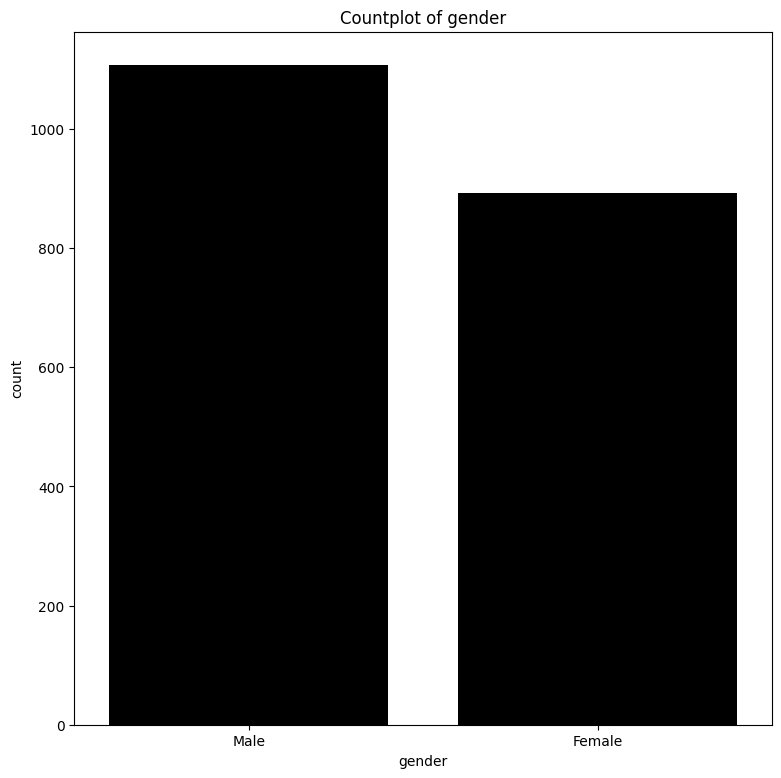

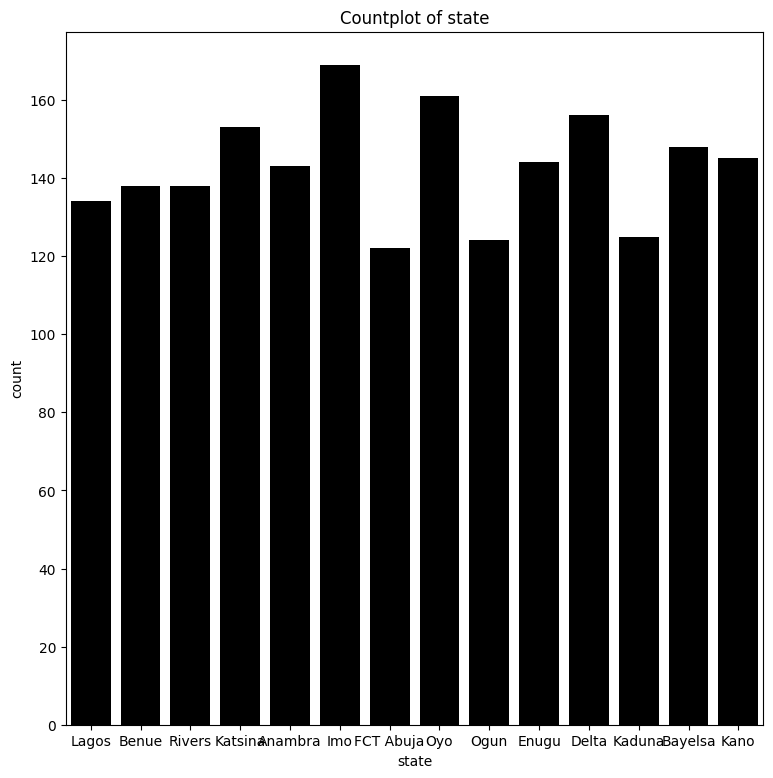

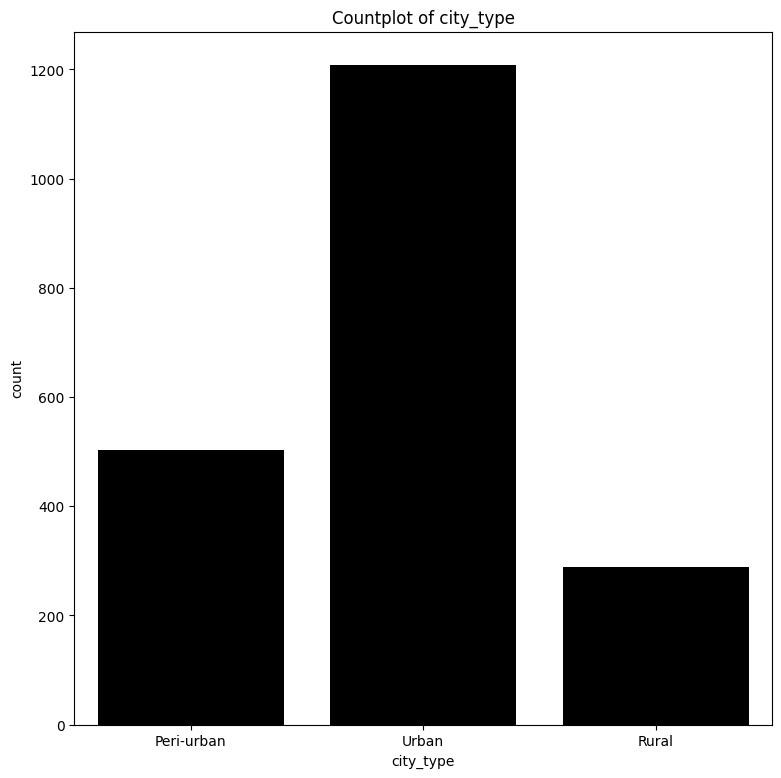

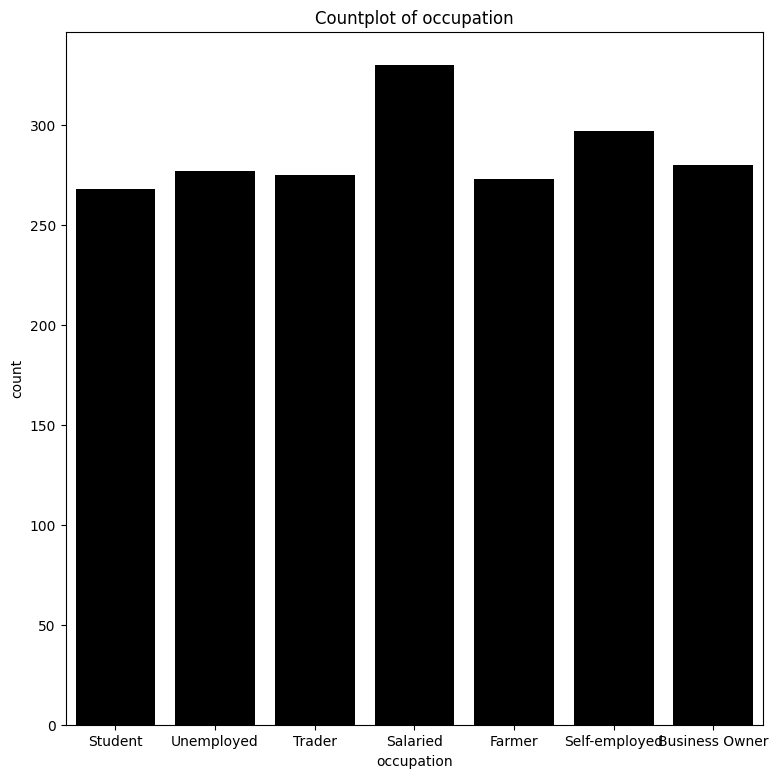

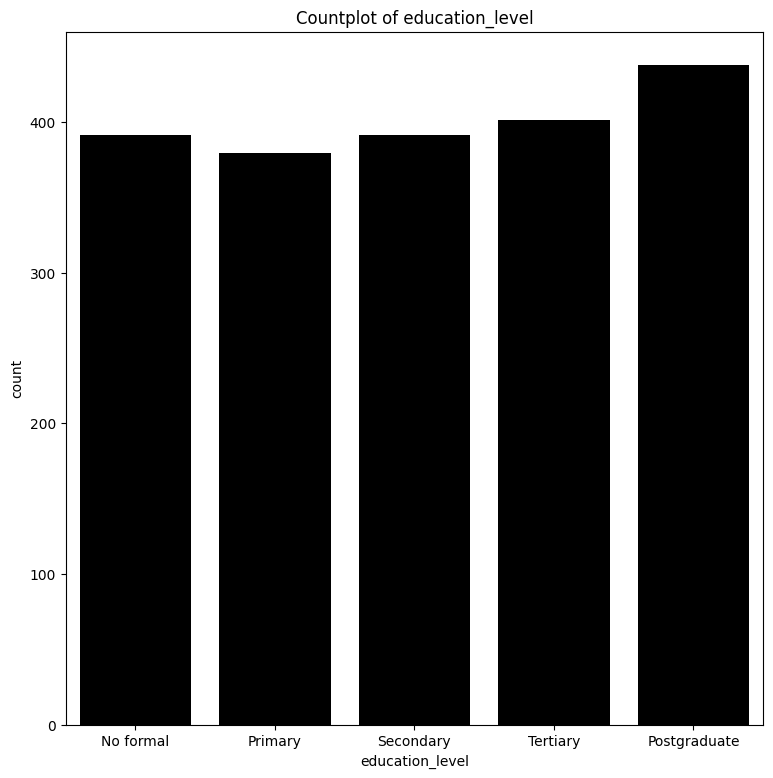

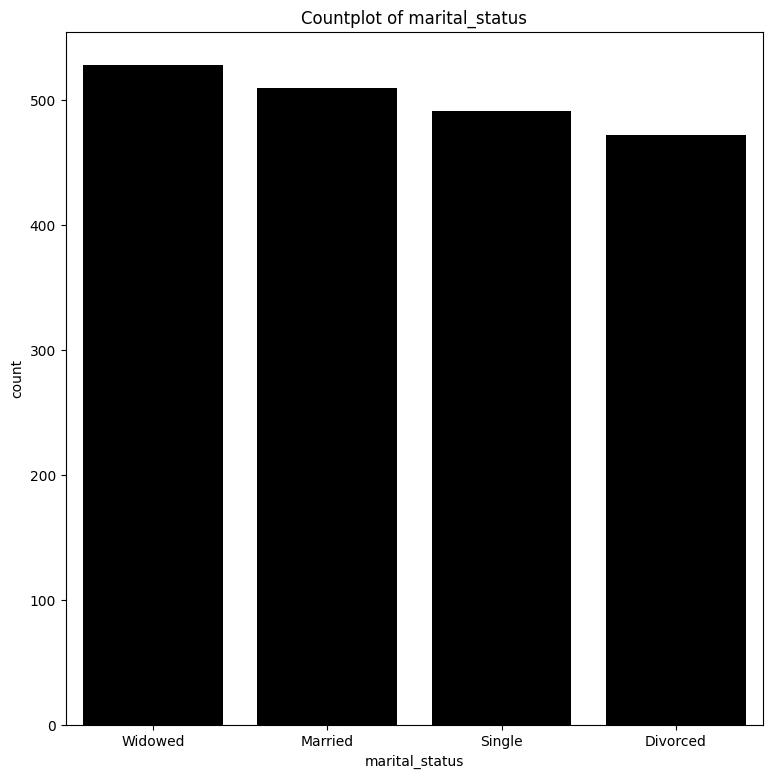

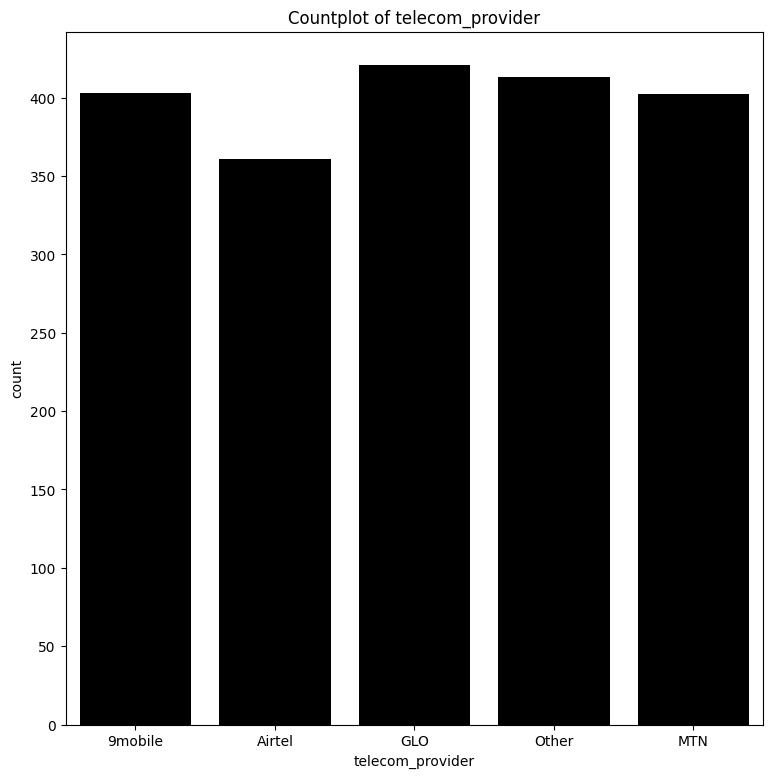

In [28]:
for cats in cat_cols:
    plt.figure(figsize=(9,9))
    sns.countplot(data=df, x=cats, color='black', orient='v')
    plt.title(f'Countplot of {cats}')
    plt.show()

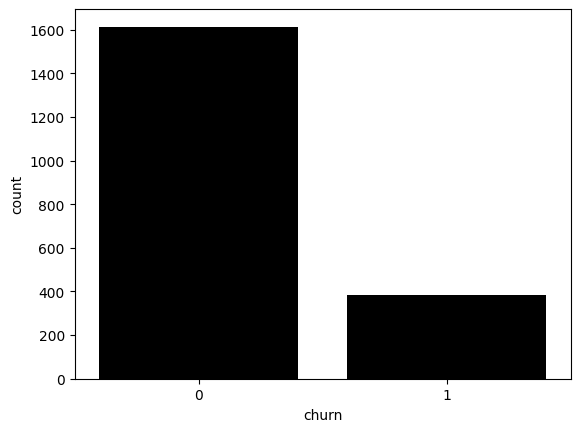

In [29]:
sns.countplot(x='churn', data=df, color='black')
plt.show()

- Preprocessing (Oversampling Churn), encoding and scaling.

In [30]:
cat_cols = ['gender', 'state', 'city_type', 'occupation', 'education_level', 'marital_status', 'telecom_provider']
feature_cols = ['gender', 'age', 'state', 'city_type', 'occupation', 'education_level', 'marital_status',
                'num_dependents', 'income_monthly_ngn', 'avg_balance_ngn', 'monthly_deposit_ngn',
                'monthly_withdrawal_ngn', 'monthly_transactions', 'num_products', 'has_mobile_app',
                'uses_agent', 'loan_active', 'savings_goal_met', 'recent_complaints', 'last_login_days_ago',
                'bvn_verified', 'nin_linked', 'telecom_provider']
encoder = {}
for col in cat_cols:
    encoder[col] = LabelEncoder()
    df[col] = encoder[col].fit_transform(df[col].astype(str))  # .astype(st

In [31]:
df.head()

,gender,age,state,city_type,occupation,education_level,marital_status,num_dependents,income_monthly_ngn,avg_balance_ngn,...,has_mobile_app,uses_agent,loan_active,savings_goal_met,recent_complaints,last_login_days_ago,bvn_verified,nin_linked,telecom_provider,churn
0,1,45,10,0,4,0,3,1,171790.0,20470.0,...,1,1,0,0,0,142,1,1,0,1
1,0,24,2,0,6,0,3,3,13816.0,73385.0,...,1,0,0,0,0,343,1,1,1,1
2,0,52,10,2,6,0,1,5,49325.0,15407.0,...,1,0,0,1,0,215,0,1,0,0
3,0,45,13,1,5,2,1,2,122653.0,111059.0,...,1,0,0,0,0,233,1,1,1,0
4,1,31,13,2,5,3,1,2,80714.0,3705.0,...,0,1,0,0,0,54,1,0,2,0


In [32]:
df_1 = df[df['churn'] ==1]
df_0 = df[df['churn'] ==0]

count0,count1 = df.churn.value_counts()
count0,count1

(1614, 386)

In [33]:
df_1_oversampled = df_1.sample(count0, replace=True, random_state=42)
df_balanced = pd.concat([df_0, df_1_oversampled])

In [34]:
df_balanced.head()

,gender,age,state,city_type,occupation,education_level,marital_status,num_dependents,income_monthly_ngn,avg_balance_ngn,...,has_mobile_app,uses_agent,loan_active,savings_goal_met,recent_complaints,last_login_days_ago,bvn_verified,nin_linked,telecom_provider,churn
2,0,52,10,2,6,0,1,5,49325.0,15407.0,...,1,0,0,1,0,215,0,1,0,0
3,0,45,13,1,5,2,1,2,122653.0,111059.0,...,1,0,0,0,0,233,1,1,1,0
4,1,31,13,2,5,3,1,2,80714.0,3705.0,...,0,1,0,0,0,54,1,0,2,0
6,1,33,0,0,1,2,1,3,100176.0,4801.0,...,1,0,0,1,0,170,1,0,4,0
7,0,33,9,2,3,0,1,1,24479.0,2889.0,...,1,1,1,0,0,172,1,1,2,0


In [35]:
x = df_balanced.drop('churn', axis=1)
y = df_balanced['churn']

- Model Training

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print("Preprocessing complete. Shape of x_train_scaled:", x_train_scaled.shape)
print("Sample encoded values:")
for col in cat_cols[:2]:  # Show first 2 for verification
    print(f"{col}: {df[col].head().tolist()}")

Preprocessing complete. Shape of x_train_scaled: (2582, 23)
Sample encoded values:
gender: [1, 0, 0, 0, 1]
state: [10, 2, 10, 13, 13]


In [38]:
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


- Model Evaluation

In [39]:
y_pred = model2.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       348
           1       0.98      0.96      0.97       298

    accuracy                           0.97       646
   macro avg       0.97      0.97      0.97       646
weighted avg       0.97      0.97      0.97       646



In [41]:
joblib.dump(model2, 'financial_churn_model.pkl')
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']